# JOB SKILL ANALYSIS FOR TOP 5 APPEARNING POSTINGS

In [1]:
# STEP 1 : LOAD DATA AND MAKE NECESSARY CHANGES TO CLEAN IT
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
data_set = load_dataset('lukebarousse/data_jobs')
df= data_set['train'].to_pandas()

# Cleaning Up Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)


In [8]:
# SORTING FOR JOB POSTINGS IN INIDA
df_india = df[df['job_country']=='India'].copy()

In [9]:
# EXPLODING THE JOBS SKILLS COLUMN TO RUN VALUE COUNT 
df_explode_india = df_india.explode('job_skills')


In [16]:
# RUNNING GROUP BY SIZE ON SKILLS 
df_skills = df_explode_india.groupby(['job_skills','job_title_short']).size()

In [17]:
# CONVERTING THE DATA TYPE TO DATA FRAM FROM SERIES
df_skills= df_skills.reset_index(name='skill_count')

In [18]:
# SORTING IN DESCENDING ORDER
df_skills.sort_values(by='skill_count',ascending=False,inplace=True)

In [19]:
df_skills

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [61]:
# SELECTING THE MOST POPULAR JOBS POSTED
job_titles = df_skills['job_title_short'].unique().tolist()
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Software Engineer',
 'Business Analyst',
 'Senior Data Analyst',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [65]:
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

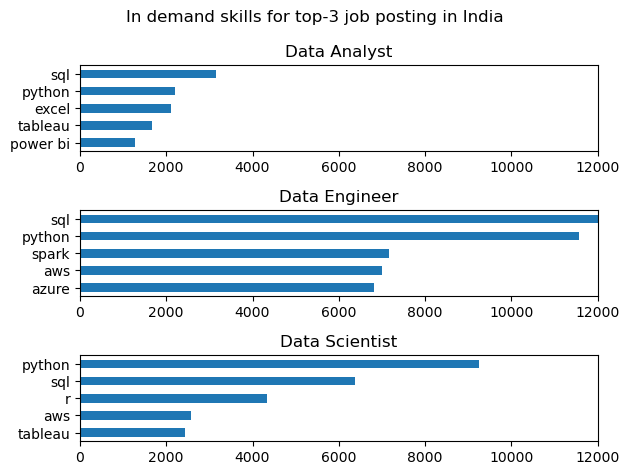

In [66]:
fig, ax = plt.subplots(len(job_titles), 1)

if len(job_titles) == 1:
    ax = [ax]  # make sure it's always iterable

for i, job_title in enumerate(job_titles):
    df_plot = df_skills[df_skills['job_title_short'] == job_title].head(5)

    if df_plot.empty:
        print(f"Skipping '{job_title}' — no matching data.")
        continue

    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    fig.suptitle('In demand skills for top-3 job posting in India', fontsize=12)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,12000)
    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()


In [67]:
# TO IMPROVE THE AVAILABLE PLOT WE CAN ANALYZE BY COMPARING THE %(LIKELIHOOD) OF THESE SKILLS FOR ALL THE POSTING

In [80]:
# ON THE ORIGINAL SORTED DATA FRAME FOR INDIAN JOB POSTINGS, TOTALLING THE NO. OF POSTING BY TITLE
df_job_total = df_india.value_counts(['job_title_short']).reset_index(name='job_total')
type(df_job_total) # verifying change in data type

pandas.core.frame.DataFrame

In [82]:
df_merged = pd.merge(df_skills,df_job_total,how='left',on='job_title_short') 
# merging two dataframes to show case no of job titles and thier respective total of req skills

In [83]:
df_merged

,job_skills,job_title_short,skill_count,job_total
0,sql,Data Engineer,12993,19062
1,python,Data Engineer,11568,19062
2,python,Data Scientist,9248,13279
3,spark,Data Engineer,7157,19062
4,aws,Data Engineer,6993,19062
...,...,...,...,...
1684,angular.js,Data Scientist,1,13279
1685,arch,Business Analyst,1,1887
1686,mlpack,Data Engineer,1,19062
1687,yarn,Senior Data Scientist,1,2486


In [84]:
df_merged['perc of occur'] = 100 * (df_merged['skill_count']/df_merged['job_total'])

In [85]:
df_merged

,job_skills,job_title_short,skill_count,job_total,perc of occur
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


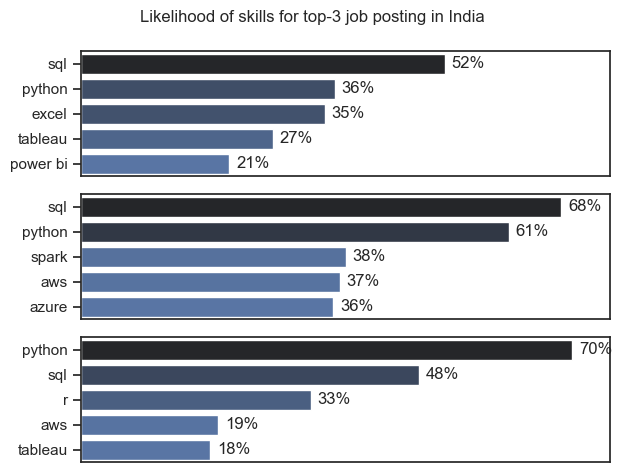

In [107]:
import seaborn as sns
sns.set_theme(style='ticks')

fig, ax = plt.subplots(len(job_titles), 1)

if len(job_titles) == 1:
    ax = [ax]  # make iterable

for i, job_title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == job_title].head(5)
    sns.barplot(df_plot, x='perc of occur', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    
   
    if i != len(job_titles) - 1:  # if not the last plot
        ax[i].set_xticks([])

    fig.suptitle('Likelihood of skills for top-3 job posting in India', fontsize=12)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,75)
    # TO ADD % IN THE BAR PLOT
    for n,v in enumerate(df_plot['perc of occur']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    ax[i].set_xticks([]) # REMOVES ALL THE POINTS ON X AXIS, to get it on the last plot
     


fig.tight_layout()
plt.show()
